In [13]:
#Instalasi dan Import Library
!pip install pandas_datareader plotly seaborn geopandas

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import geopandas as gpd
from pandas_datareader import wb

# Menampilkan versi library utama
print("pandas:", pd.__version__)


pandas: 2.2.2


In [14]:
pip install streamlit pandas plotly seaborn

In [2]:
#mengmbil data pendidikan global dari World Bank API
indicators = {
    'SE.PRM.ENRR': 'Primary Enrollment (%)',
    'SE.SEC.ENRR': 'Secondary Enrollment (%)',
    'NY.GDP.PCAP.CD': 'GDP per Capita (USD)'
}

# Ambil data tahun 2000–2022 untuk seluruh negara
data = wb.download(
    indicator=list(indicators.keys()),
    country='all',
    start=2000,
    end=2022
).reset_index()

# Ganti nama kolom agar lebih mudah dibaca
data.rename(columns=indicators, inplace=True)

# Lihat 5 baris pertama
#data.head()

print(data)


          country  year  Primary Enrollment (%)  Secondary Enrollment (%)  \
0     Afghanistan  2000               21.457850                       NaN   
1     Afghanistan  2001               22.139650                  14.04041   
2     Afghanistan  2002               73.401314                       NaN   
3     Afghanistan  2003               95.335747                  13.95953   
4     Afghanistan  2004              105.475052                  19.21438   
...           ...   ...                     ...                       ...   
6113     Zimbabwe  2018               93.755202                       NaN   
6114     Zimbabwe  2019               93.427097                       NaN   
6115     Zimbabwe  2020               93.612586                       NaN   
6116     Zimbabwe  2021               92.784691                       NaN   
6117     Zimbabwe  2022               93.165966                       NaN   

      GDP per Capita (USD)  
0               174.930991  
1               1

/tmp/ipython-input-3697861259.py:9: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  data = wb.download(


In [3]:
#Eksplorasi data
print("Ukuran data:", data.shape)
print("\nKolom:", data.columns)
print("\nCek nilai null:")
print(data.isnull().sum())

# Hapus data yang banyak missing
data = data.dropna(subset=['Primary Enrollment (%)', 'Secondary Enrollment (%)', 'GDP per Capita (USD)'])
print("\nData setelah dibersihkan:", data.shape)

# Statistik deskriptif
data.describe()


Ukuran data: (6118, 5)

Kolom: Index(['country', 'year', 'Primary Enrollment (%)', 'Secondary Enrollment (%)',
       'GDP per Capita (USD)'],
      dtype='object')

Cek nilai null:
country                        0
year                           0
Primary Enrollment (%)      1223
Secondary Enrollment (%)    1711
GDP per Capita (USD)         176
dtype: int64

Data setelah dibersihkan: (4322, 5)


,Primary Enrollment (%),Secondary Enrollment (%),GDP per Capita (USD)
count,4322.000000,4322.000000,4322.000000
mean,101.598453,79.452939,14302.407402
std,11.908872,28.151603,21363.739142
min,22.139650,5.940960,109.593814
25%,97.347475,60.681806,1718.513464
50%,101.411167,86.232090,5413.274839
75%,106.328049,99.528866,17626.200853
max,175.821576,164.079819,204263.797114


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


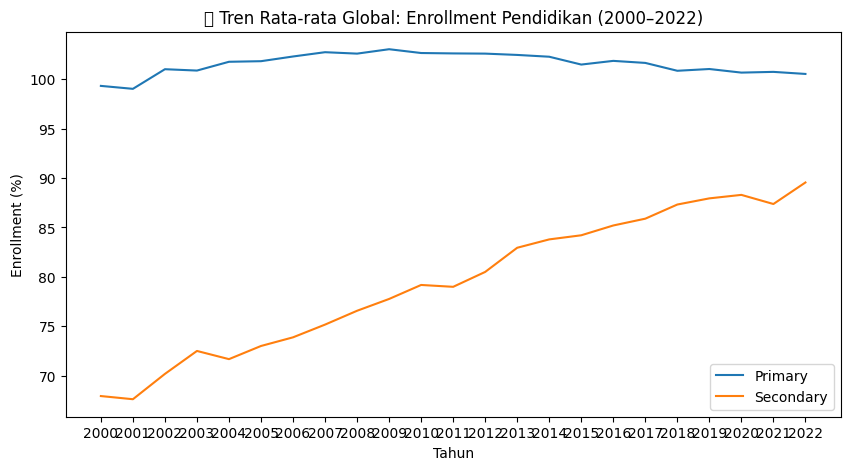

In [4]:
#Tren global rata-rata pendidikan
global_trend = data.groupby('year')[['Primary Enrollment (%)', 'Secondary Enrollment (%)']].mean().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(data=global_trend, x='year', y='Primary Enrollment (%)', label='Primary')
sns.lineplot(data=global_trend, x='year', y='Secondary Enrollment (%)', label='Secondary')
plt.title('📈 Tren Rata-rata Global: Enrollment Pendidikan (2000–2022)')
plt.ylabel('Enrollment (%)')
plt.xlabel('Tahun')
plt.legend()
plt.show()


Tahun dengan data paling lengkap: 2011


/tmp/ipython-input-972302939.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=compare_best, x='Primary Enrollment (%)', y='country', palette='viridis')
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


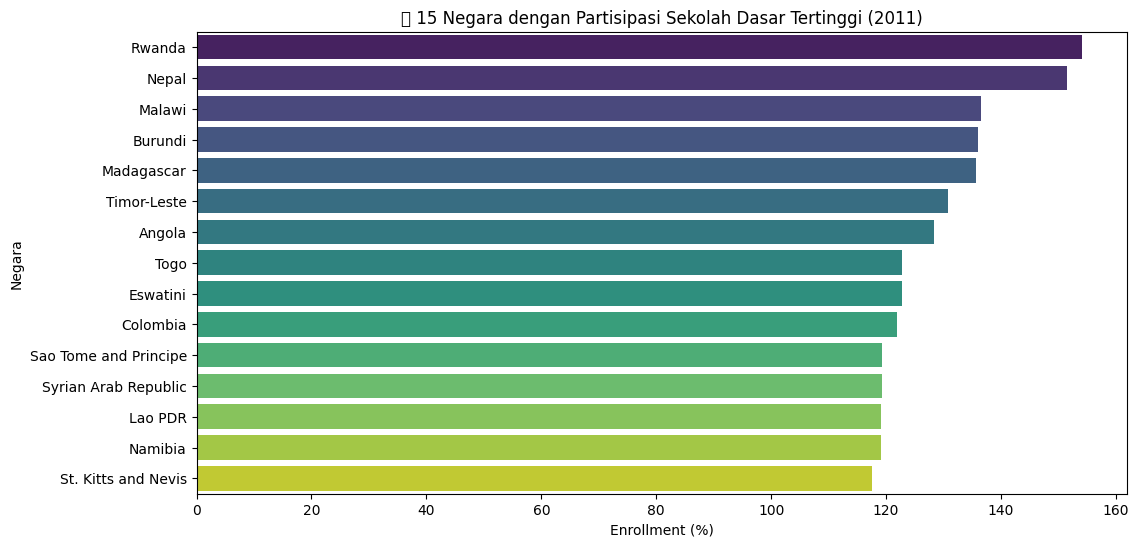

In [5]:
# Cek tahun dengan data paling banyak untuk kolom Primary Enrollment
tahun_terbaik = (
    data.dropna(subset=['Primary Enrollment (%)'])
    .groupby('year')
    .size()
    .idxmax()
)

print("Tahun dengan data paling lengkap:", tahun_terbaik)

# Ambil data tahun tersebut
compare_best = data[data['year'] == tahun_terbaik].sort_values('Primary Enrollment (%)', ascending=False).head(15)

plt.figure(figsize=(12,6))
sns.barplot(data=compare_best, x='Primary Enrollment (%)', y='country', palette='viridis')
plt.title(f'📊 15 Negara dengan Partisipasi Sekolah Dasar Tertinggi ({tahun_terbaik})')
plt.xlabel('Enrollment (%)')
plt.ylabel('Negara')
plt.show()


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


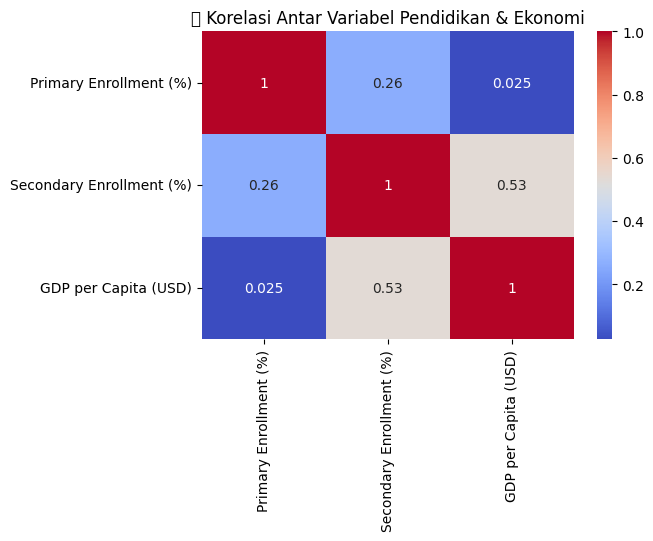

In [6]:
# Tahap 6: Korelasi
corr = data[['Primary Enrollment (%)', 'Secondary Enrollment (%)', 'GDP per Capita (USD)']].corr()

plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('🔥 Korelasi Antar Variabel Pendidikan & Ekonomi')
plt.show()


In [7]:
# Cek tahun dengan data paling lengkap untuk indikator pendidikan
tahun_terbaik = (
    data.dropna(subset=['Primary Enrollment (%)'])
    .groupby('year')
    .size()
    .idxmax()
)

print("Tahun dengan data paling lengkap:", tahun_terbaik)

# Filter data untuk tahun tersebut
data_tahun = data[data['year'] == tahun_terbaik].dropna(
    subset=['Primary Enrollment (%)', 'Secondary Enrollment (%)', 'GDP per Capita (USD)']
)

print("Jumlah data valid:", len(data_tahun))
data_tahun.head()


Tahun dengan data paling lengkap: 2011
Jumlah data valid: 200


,country,year,Primary Enrollment (%),Secondary Enrollment (%),GDP per Capita (USD)
11,Afghanistan,2011,101.542084,52.447430,606.694676
34,Africa Eastern and Southern,2011,100.985237,39.491508,1761.989261
57,Africa Western and Central,2011,87.822006,40.171680,1844.054367
80,Albania,2011,101.580274,95.470528,4465.709143
103,Algeria,2011,112.733765,103.184273,5916.313644


In [8]:
# Tahap 7: Hubungan GDP per Capita vs Secondary Enrollment
import plotly.express as px

fig = px.scatter(
    data_tahun,
    x='GDP per Capita (USD)',
    y='Secondary Enrollment (%)',
    color='country',
    hover_name='country',
    size='GDP per Capita (USD)',
    title=f'⚪ GDP per Capita vs Secondary Enrollment ({tahun_terbaik})',
    template='plotly_dark'
)
fig.show()



In [9]:
# Tahap 8: Geo Map
fig = px.choropleth(
    data_tahun,
    locations='country',
    locationmode='country names',
    color='Primary Enrollment (%)',
    hover_name='country',
    color_continuous_scale='viridis',
    title=f'🌍 Peta Dunia: Partisipasi Sekolah Dasar ({tahun_terbaik})'
)
fig.show()



In [10]:
# Tahap 9: Dashboard sederhana di Plotly
fig = px.line(
    data[data['country'].isin(['Indonesia', 'Malaysia', 'Singapore', 'Philippines'])],
    x='year',
    y='Secondary Enrollment (%)',
    color='country',
    title='📊 Tren Partisipasi Sekolah Menengah di Asia Tenggara (2000–2022)'
)
fig.show()
